In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [3]:
sns.set(rc={'figure.figsize':(8,4.5)})

In [4]:
airbnb_data_full = pd.read_csv('AB_NYC_2019.csv')

In [5]:
airbnb_data_full.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
airbnb_data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
airbnb_data_full.isna().sum() 

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
airbnb_data_full.duplicated().sum()
# airbnb_data_full.drop_duplicates(inplace=True)

0

In [9]:
# 48895 entries
for colname in airbnb_data_full.columns:
    print(f'{colname} : {len(airbnb_data_full[colname].unique())} unique values')

id : 48895 unique values
name : 47906 unique values
host_id : 37457 unique values
host_name : 11453 unique values
neighbourhood_group : 5 unique values
neighbourhood : 221 unique values
latitude : 19048 unique values
longitude : 14718 unique values
room_type : 3 unique values
price : 674 unique values
minimum_nights : 109 unique values
number_of_reviews : 394 unique values
last_review : 1765 unique values
reviews_per_month : 938 unique values
calculated_host_listings_count : 47 unique values
availability_365 : 366 unique values


In [10]:
airbnb_data = airbnb_data_full.drop(['id', 'name', 'host_id', 'host_name', 'last_review'], axis=1)

In [11]:
airbnb_data.head(3)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365


In [12]:
# Missing values in percent
(airbnb_data.isna().sum() / airbnb_data.shape[0]) * 100

neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

20% missing in reviews_per_month

In [13]:
airbnb_data['reviews_per_month'].min()

0.01

In [14]:
airbnb_data.fillna({'reviews_per_month':0.0}, inplace=True)
# airbnb_data = airbnb_data.drop(['reviews_per_month'], axis=1)

In [15]:
airbnb_data.head(3)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365


In [16]:
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               48895 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 4.1+ MB


Features "name", "neighbourhood_group", "neighbourhood" and "room_type" are object. 
Feature "neighbourhood_group" has 5 groups. Feature "room_type" has 3 types. Feature "name" should be dropped.

In [17]:
airbnb_data.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Price 0 and minimum_nights 1250 look strange. Remove price 0.

In [18]:
airbnb_data = airbnb_data[airbnb_data.price != 0]

In [19]:
# airbnb_data = airbnb_data[airbnb_data.minimum_nights <= 500]

In [20]:
(airbnb_data.price <= 0 ).sum()

0

In [21]:
print(f'Shape before = {airbnb_data_full.shape}, shape now = {airbnb_data.shape}')

Shape before = (48895, 16), shape now = (48884, 11)


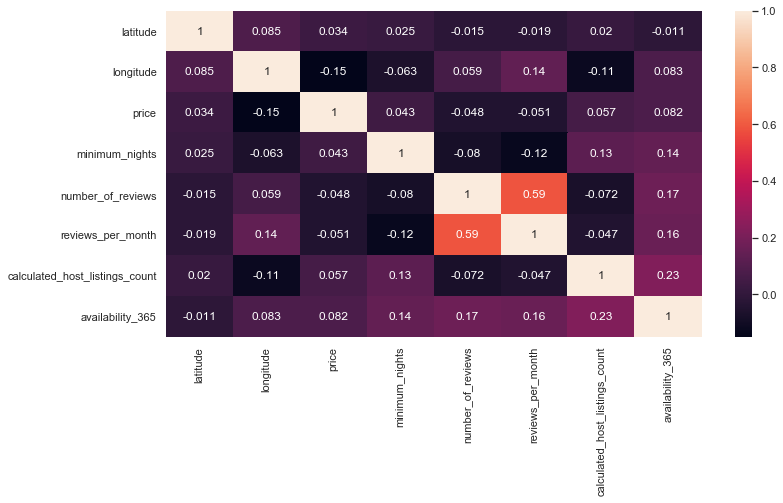

In [22]:
feature_correlation = airbnb_data.corr()
plt.figure(figsize=(12,6))
sns.heatmap(feature_correlation, annot=True)

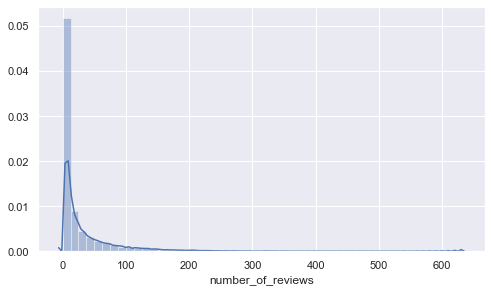

In [23]:
sns.distplot(airbnb_data.number_of_reviews)

Both grapics have abnormal distribution => Choose the kendall corr

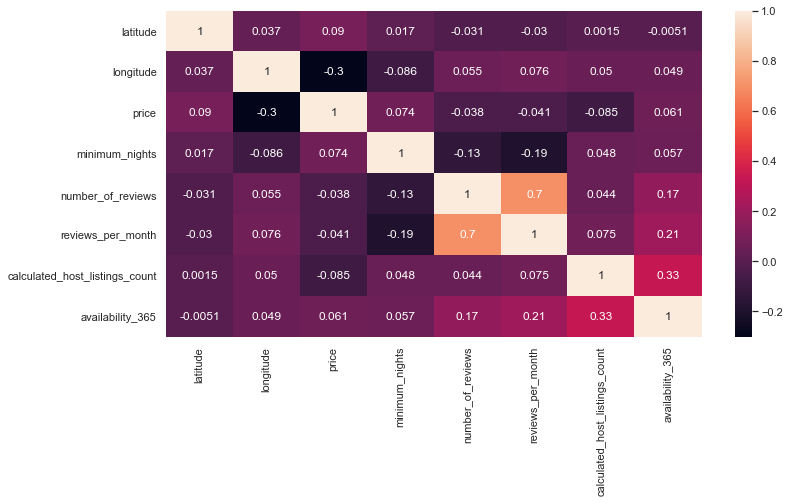

In [24]:
feature_correlation = airbnb_data.corr(method='kendall')
plt.figure(figsize=(12,6))
sns.heatmap(feature_correlation, annot=True)

Learn the features "neighbourhood_group", "neighbourhood" and "room_type" (object). 

Text(0.5, 1.0, 'Neighbourhood Group')

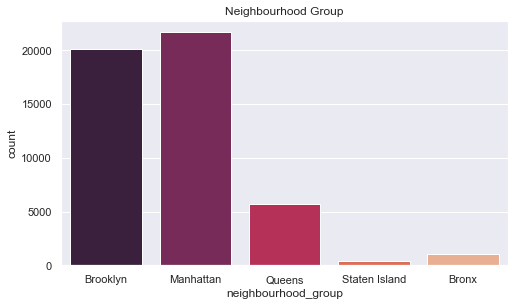

In [25]:
sns.countplot(airbnb_data['neighbourhood_group'], palette='rocket')
plt.title('Neighbourhood Group')

Text(0.5, 1.0, 'Neighbourhood')

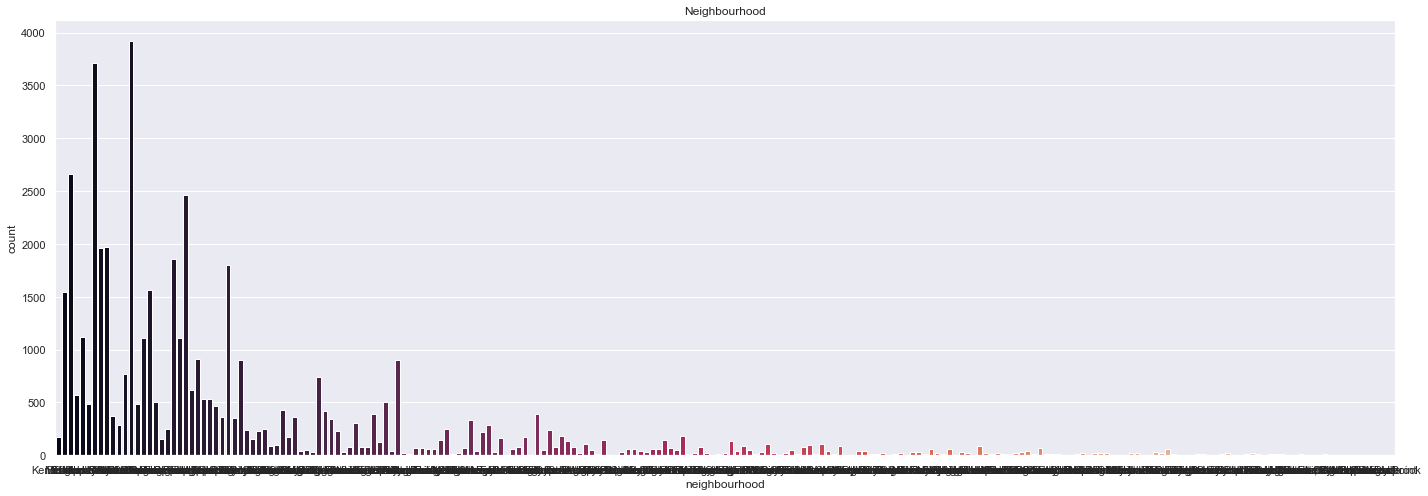

In [26]:
ax = sns.countplot(airbnb_data['neighbourhood'], palette='rocket')
fig = plt.gcf()
fig.set_size_inches(24,8)
plt.title('Neighbourhood')

Text(0.5, 1.0, 'Room type')

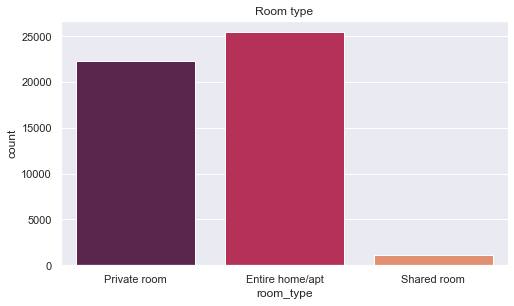

In [27]:
sns.countplot(airbnb_data['room_type'], palette="rocket")
plt.title('Room type')

In [28]:
# sns.boxplot(data=airbnb_data, x='neighbourhood_group',y='availability_365',palette='rocket')

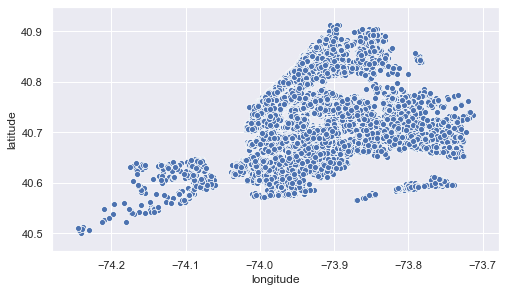

In [29]:
sns.scatterplot(airbnb_data.longitude, airbnb_data.latitude)
# sns.scatterplot(airbnb_data.longitude, airbnb_data.latitude, hue=airbnb_data.neighbourhood_group)

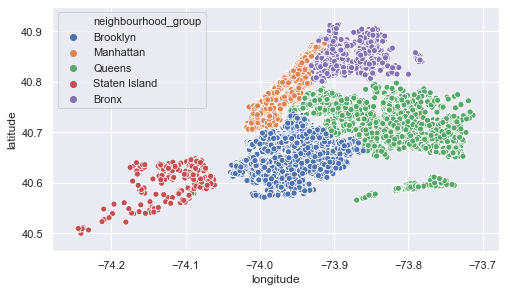

In [30]:
sns.scatterplot(airbnb_data.longitude, airbnb_data.latitude, hue=airbnb_data.neighbourhood_group)

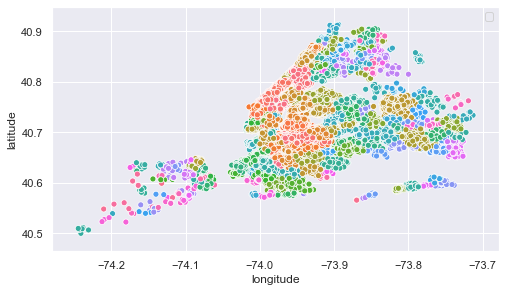

In [31]:
ax = sns.scatterplot(airbnb_data.longitude, airbnb_data.latitude, hue=airbnb_data.neighbourhood)
ax.legend([])

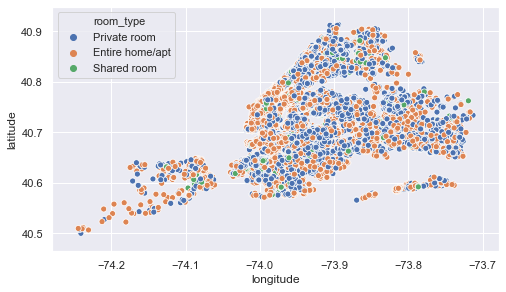

In [32]:
sns.scatterplot(airbnb_data.longitude, airbnb_data.latitude, hue=airbnb_data.room_type)

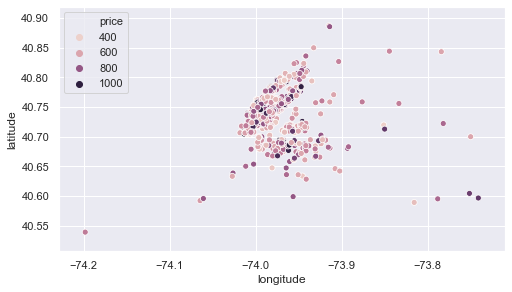

In [33]:
# airbnb_data.price.quantile(q=0.5)
airbnb_data_choosen = airbnb_data[(airbnb_data.price < 1000) & (airbnb_data.price > 500)]
sns.scatterplot(airbnb_data_choosen.longitude, airbnb_data_choosen.latitude, hue=airbnb_data_choosen.price)

=============================================================

In [34]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_features = airbnb_data.select_dtypes(include=numerics).columns

In [35]:
num_features

Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

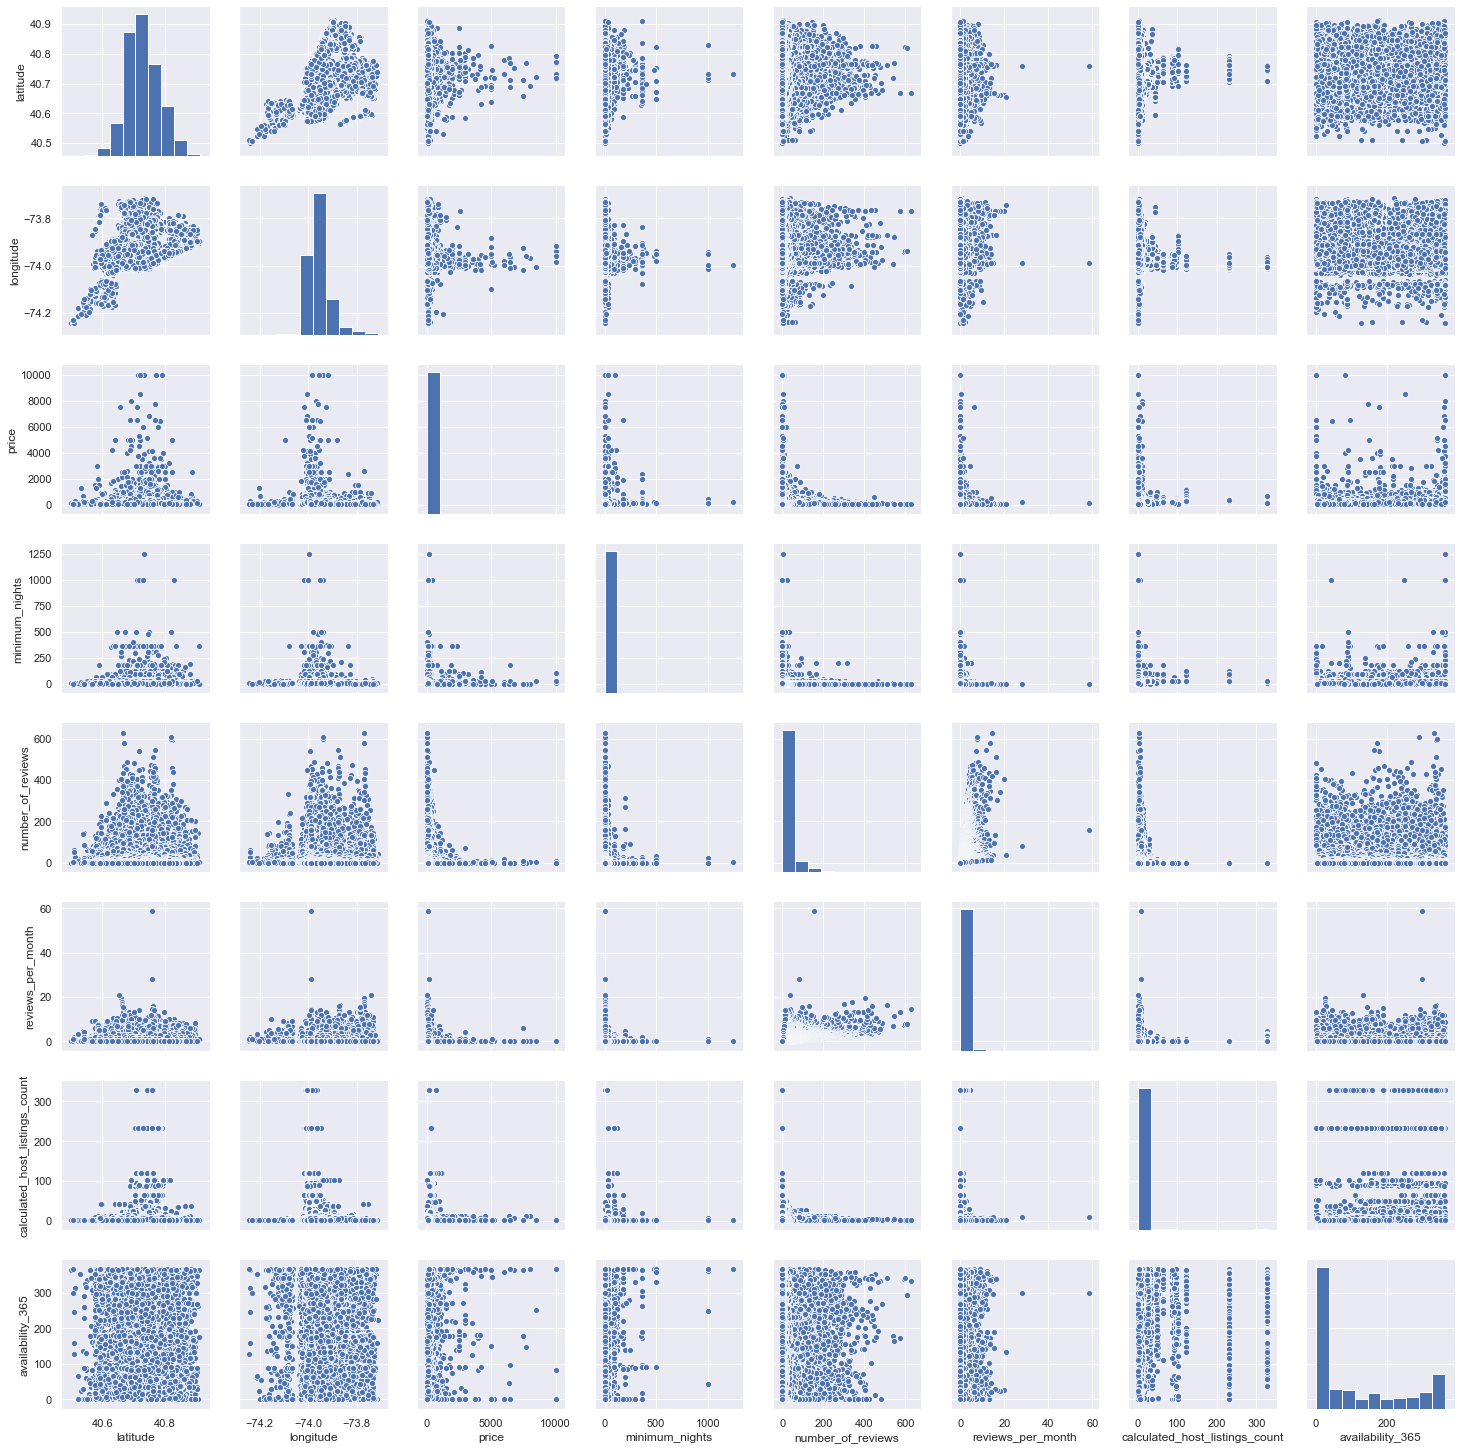

In [36]:
sns.set()
sns.pairplot(airbnb_data[num_features])

In [37]:
# Index(['host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
#        'number_of_reviews', 'reviews_per_month',
#        'calculated_host_listings_count', 'availability_365'],
#       dtype='object')

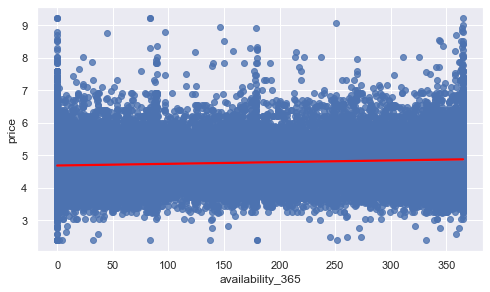

In [38]:
sns.regplot(airbnb_data.availability_365, np.log1p(airbnb_data.price), line_kws={"color": "red"})

availability_365 and host_id have low correlation

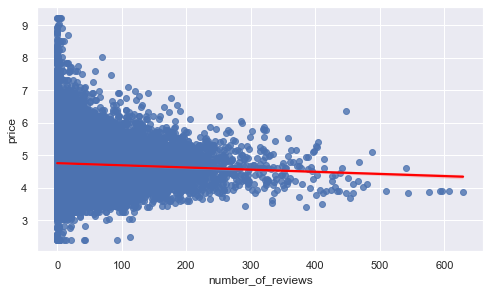

In [39]:
sns.regplot(airbnb_data.number_of_reviews, np.log1p(airbnb_data.price), line_kws={"color": "red"})

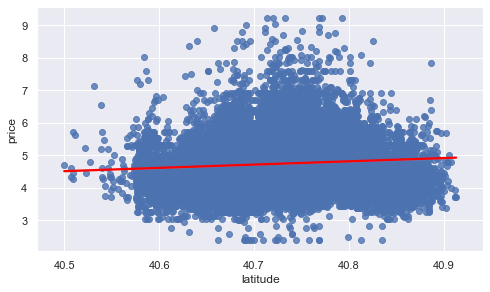

In [40]:
sns.regplot(airbnb_data.latitude, np.log1p(airbnb_data.price), line_kws={"color": "red"})

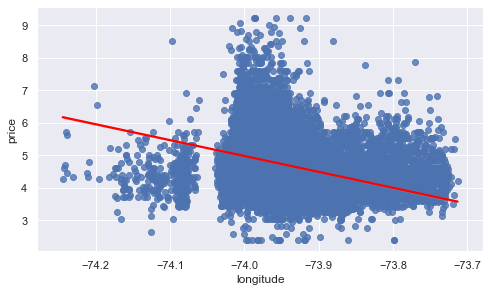

In [41]:
sns.regplot(airbnb_data.longitude,
            np.log1p(airbnb_data.price), 
            line_kws={"color": "red"})

===========================================================

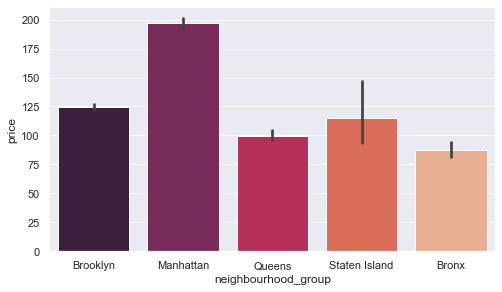

In [42]:
# "neighbourhood_group", "neighbourhood" and "room_type"
sns.barplot(x='neighbourhood_group', y='price', data=airbnb_data, palette="rocket")

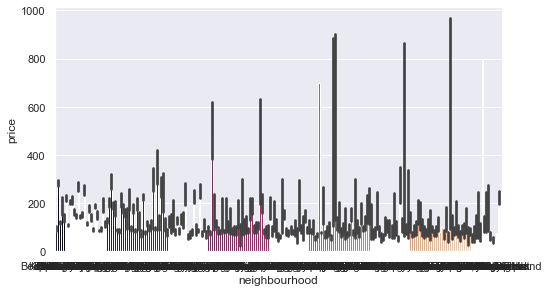

In [43]:
sns.barplot(x='neighbourhood', y='price', data=airbnb_data, palette="rocket")

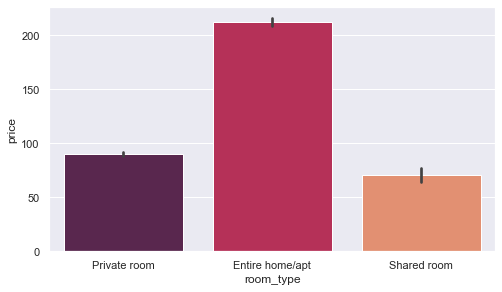

In [44]:
sns.barplot(x='room_type', y='price', data=airbnb_data, palette="rocket")

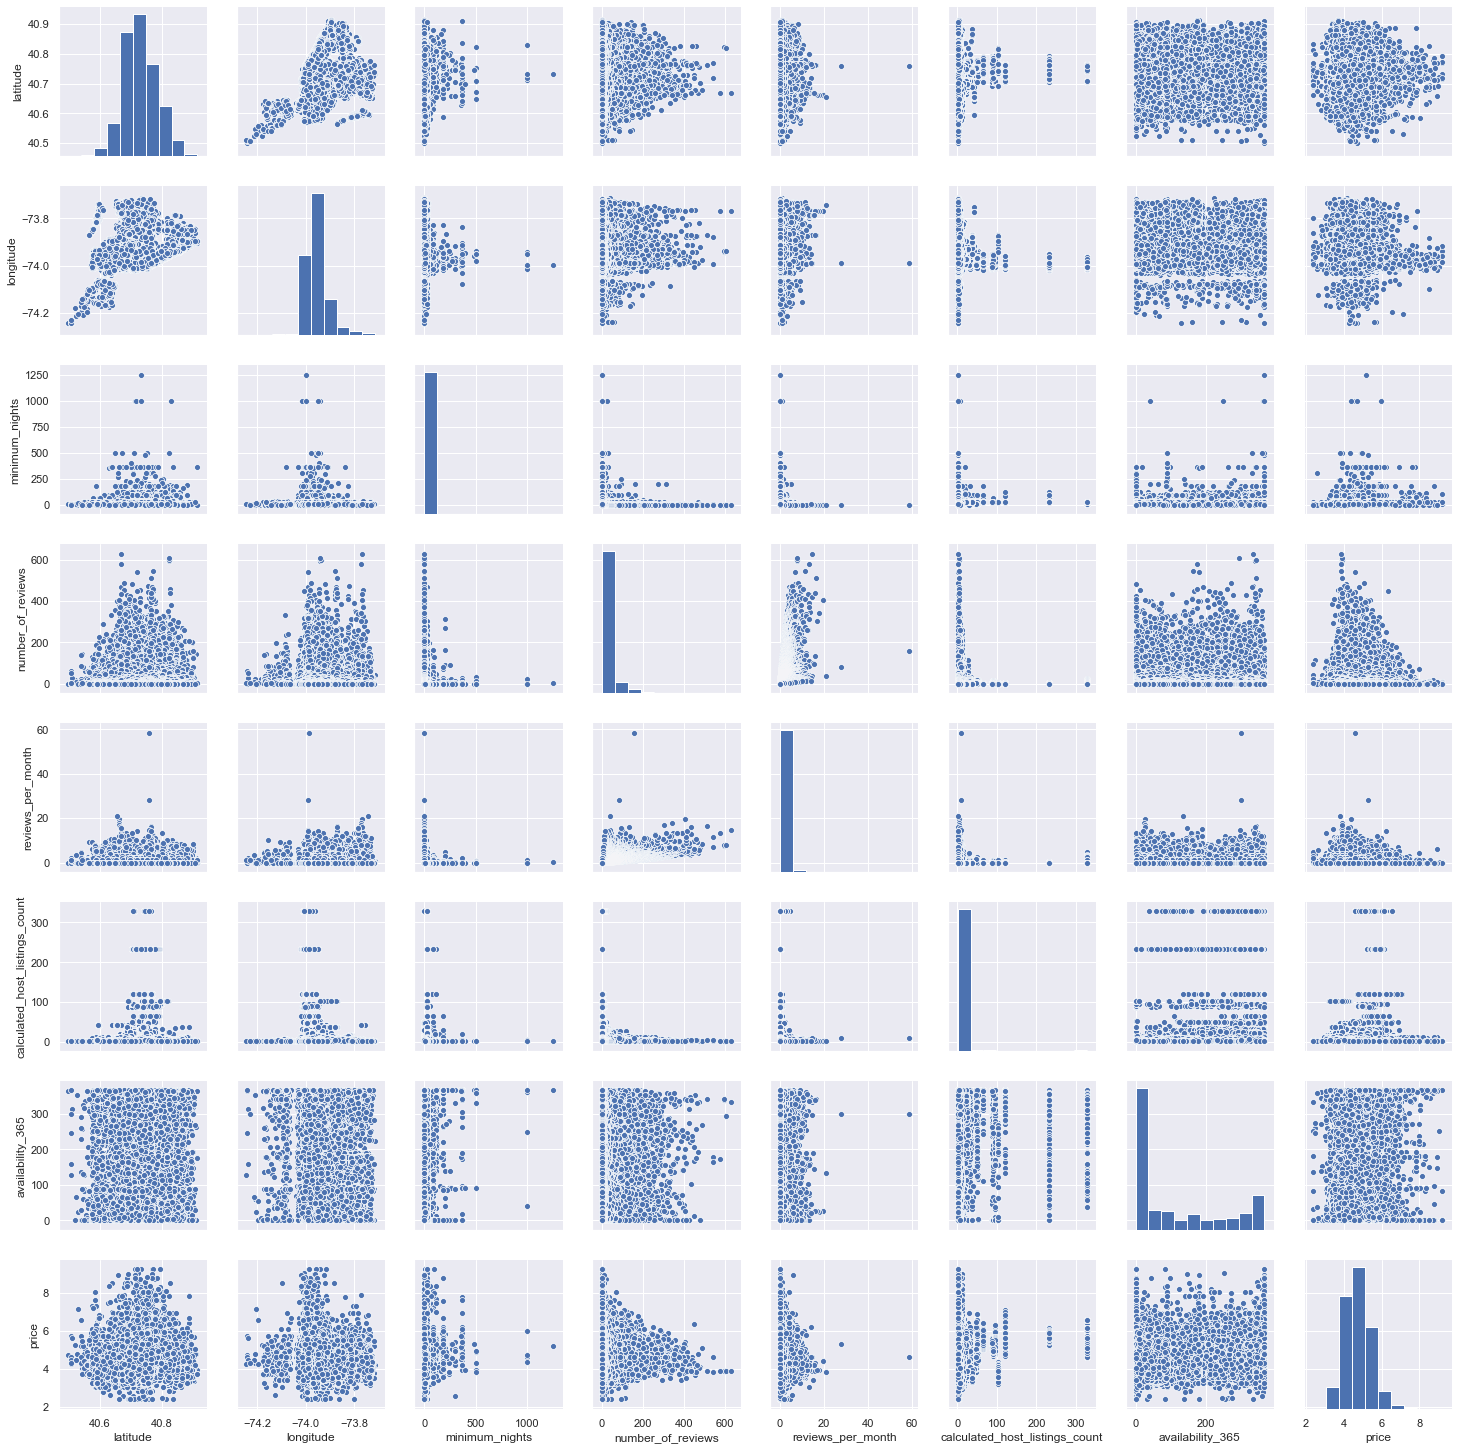

In [45]:
# correlation with log(1+y)
sns.pairplot(pd.concat(
    (airbnb_data[num_features].drop('price', axis=1),
     np.log1p(airbnb_data.price)), axis=1)
)

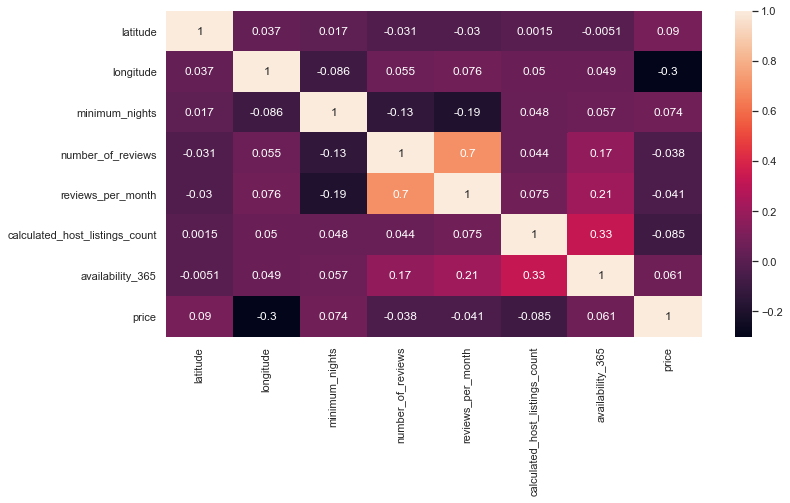

In [46]:
feature_correlation = pd.concat((airbnb_data[num_features].drop('price', axis=1),
     np.log1p(airbnb_data.price)), axis=1).corr(method='kendall')
plt.figure(figsize=(12,6))
sns.heatmap(feature_correlation, annot=True)

In [47]:
# remove 1 point from review_per_month
# airbnb_data = airbnb_data[airbnb_data.reviews_per_month <= 40]

================================================================

Split data to train and test before feature encoding and scaling

In [48]:
# latitude_longitude = pd.Series(
#     (airbnb_data.latitude * airbnb_data.longitude),
#     name='latitude_longitude')

# airbnb_data = pd.concat((airbnb_data, latitude_longitude), axis=1)

In [49]:
x = airbnb_data.drop(['price'], axis=1)
y = airbnb_data.price

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=17)

================================================================

Prepare y (price)

In [50]:
from scipy import stats
from scipy.stats import norm, skew


 mu = 151.50 and sigma = 225.75



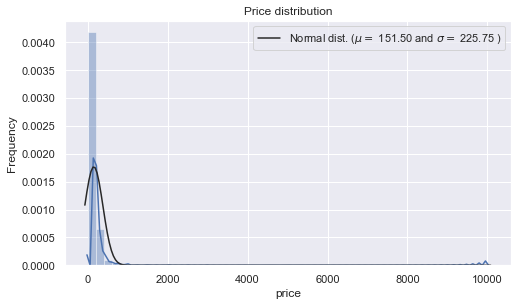

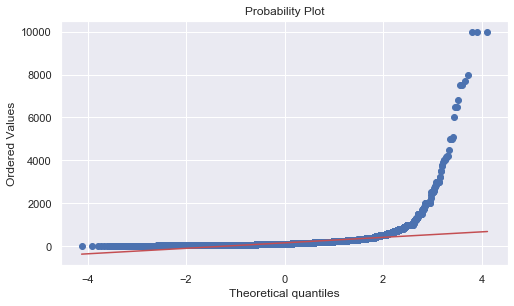

In [51]:
sns.distplot(y_train, fit=norm)

mu, sigma = norm.fit(y_train)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

fig = plt.figure()
res = stats.probplot(y_train, plot=plt)
plt.show() 

Learning the price distribution

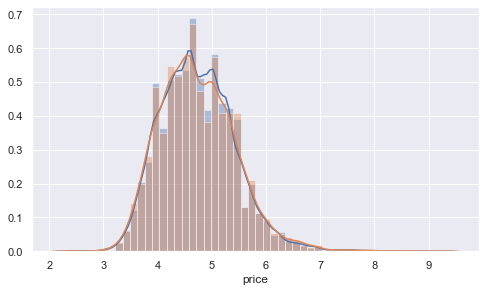

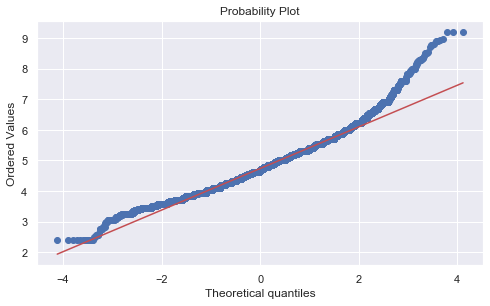

In [52]:
# y -> log(1 + y)
y_train_norm = np.log1p(y_train)
y_test_norm = np.log1p(y_test)

sns.distplot(y_train_norm)
sns.distplot(y_test_norm)

fig = plt.figure()
res = stats.probplot(y_train_norm, plot=plt)
plt.show() 

Numeric features should be normilized or scaled

In [53]:
num_x_train = x_train.select_dtypes(include=numerics)
num_x_test = x_test.select_dtypes(include=numerics)

In [54]:
# MIN-MAX SCALE

# num_x_train_scaled = pd.DataFrame(minmax_scale(num_x_train))
# num_x_train_scaled.index = num_x_train.index
# num_x_train_scaled.columns = num_x_train.columns

# num_x_test_scaled = pd.DataFrame(minmax_scale(num_x_test))
# num_x_test_scaled.index = num_x_test.index
# num_x_test_scaled.columns = num_x_test.columns

In [55]:
# STANDARD SCALE

std_scaler = StandardScaler()
num_x_train_scaled = pd.DataFrame(std_scaler.fit_transform(num_x_train))
num_x_train_scaled.index = num_x_train.index
num_x_train_scaled.columns = num_x_train.columns

num_x_test_scaled = pd.DataFrame(std_scaler.transform(num_x_test))
num_x_test_scaled.index = num_x_test.index
num_x_test_scaled.columns = num_x_test.columns

In [56]:
# Normalization

num_x_train_norm = pd.DataFrame(normalize(num_x_train))
num_x_train_norm.index = num_x_train.index
num_x_train_norm.columns = num_x_train.columns

num_x_test_norm = pd.DataFrame(normalize(num_x_test))
num_x_test_norm.index = num_x_test.index
num_x_test_norm.columns = num_x_test.columns

In [57]:
# Scaling

# num_x_train_scaled = pd.DataFrame(scale(num_x_train))
# num_x_train_scaled.index = num_x_train.index
# num_x_train_scaled.columns = num_x_train.columns

# num_x_test_scaled = pd.DataFrame(scale(num_x_test))
# num_x_test_scaled.index = num_x_test.index
# num_x_test_scaled.columns = num_x_test.columns

=========================================================================

Prepare categorical features

In [58]:
airbnb_data.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [59]:
airbnb_data.neighbourhood.unique().shape[0]

221

In [60]:
airbnb_data.neighbourhood_group.unique().shape[0]

5

In [61]:
airbnb_data.room_type.unique().shape[0]

3

neighbourhood -> Label, Target or Count Encoder;

neighbourhood_group and room_type -> One Hot Encoder

In [62]:
x_train.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
27533,Brooklyn,DUMBO,40.70231,-73.98938,Entire home/apt,2,1,0.05,1,0
15111,Bronx,Mott Haven,40.80980,-73.92149,Private room,10,0,0.00,1,358
35250,Brooklyn,Bedford-Stuyvesant,40.69250,-73.95551,Shared room,1,16,1.51,34,365
36941,Queens,Forest Hills,40.72192,-73.83931,Shared room,2,20,2.40,5,230
4973,Manhattan,Lower East Side,40.72110,-73.98397,Entire home/apt,7,9,0.27,1,255


=========================================================================

One-hot encoding

In [63]:
oh_cols = ['room_type', 'neighbourhood_group']
oh_cols_train = pd.get_dummies(x_train[oh_cols], prefix=['type', 'group'])
oh_cols_test = pd.get_dummies(x_test[oh_cols], prefix=['type', 'group'])
oh_cols_train.head()

,type_Entire home/apt,type_Private room,type_Shared room,group_Bronx,group_Brooklyn,group_Manhattan,group_Queens,group_Staten Island
27533,1,0,0,0,1,0,0,0
15111,0,1,0,1,0,0,0,0
35250,0,0,1,0,1,0,0,0
36941,0,0,1,0,0,0,1,0
4973,1,0,0,0,0,1,0,0


=========================================================================

Target Encoding

In [64]:
from category_encoders import TargetEncoder

In [65]:
# cat_cols = ['room_type', 'neighbourhood_group', 'neighbourhood']
cat_cols = ['neighbourhood']

target_enc = TargetEncoder(cols=cat_cols,
                           min_samples_leaf=10, 
                           smoothing=5)
target_enc.fit(x_train[cat_cols], y_train)

te_cols_train = target_enc.transform(x_train[cat_cols])
te_cols_test = target_enc.transform(x_test[cat_cols])

te_cols_train.head()

,neighbourhood
27533,190.688740
15111,93.164303
35250,108.354781
36941,108.065421
4973,167.106414


=========================================================================

Count Encoding

In [66]:
from category_encoders.count import CountEncoder

In [67]:
# cat_cols = ['neighbourhood']
cat_cols = []

count_enc = CountEncoder(cols=cat_cols, normalize=True, handle_unknown=0)
count_enc.fit(x_train[cat_cols], y_train)

ce_cols_train = count_enc.transform(x_train[cat_cols])
ce_cols_test = count_enc.transform(x_test[cat_cols])

ce_cols_train.head()

""
27533
15111
35250
36941
4973


=========================================================================

In [68]:
# Check the shape
x_test.shape

(12221, 10)

=====================================================================

Join numeric scaled and categorical encoded features

In [71]:
x_train_encoded = pd.concat((
    num_x_train_scaled[['latitude', 'longitude', 'availability_365']],
    num_x_train_norm[['number_of_reviews', 'minimum_nights', 
                      'reviews_per_month','calculated_host_listings_count']],
    oh_cols_train,
    ce_cols_train,
    te_cols_train), axis=1)

x_test_encoded = pd.concat((
    num_x_test_scaled[['latitude', 'longitude', 'availability_365']],
    num_x_test_norm[['number_of_reviews', 'minimum_nights', 
                     'reviews_per_month', 'calculated_host_listings_count']],
    oh_cols_test,
    ce_cols_test,
    te_cols_test), axis=1)

In [72]:
x_test_encoded.head()

,latitude,longitude,availability_365,number_of_reviews,minimum_nights,reviews_per_month,calculated_host_listings_count,type_Entire home/apt,type_Private room,type_Shared room,group_Bronx,group_Brooklyn,group_Manhattan,group_Queens,group_Staten Island,neighbourhood
15800,0.687353,-0.665489,0.358784,0.016610,0.077512,0.000720,0.005537,1,0,0,0,0,1,0,0,275.988566
27317,0.707943,0.556273,1.807287,0.338059,0.002621,0.016484,0.002621,0,1,0,0,0,0,1,0,113.247024
34634,-0.194327,-0.072766,-0.815267,0.082388,0.047079,0.007415,0.011770,1,0,0,0,1,0,0,0,146.330920
31750,-1.355256,-0.129185,-0.746653,0.448743,0.010436,0.032038,0.020872,0,1,0,0,1,0,0,0,103.028061
5931,-0.683333,-0.389231,-0.853385,0.023622,0.070866,0.000472,0.011811,1,0,0,0,1,0,0,0,155.776567


=====================================================================

Try different models

In [73]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [74]:
def evaluate(y_true, y_predicted):
    mae = metrics.mean_absolute_error(y_true, y_predicted)
    mse = metrics.mean_squared_error(y_true, y_predicted)
    rmse = np.sqrt(metrics.mean_squared_error(y_true, y_predicted))
    r2_square = metrics.r2_score(y_true, y_predicted)
    return mae, mse, rmse, r2_square

def predict(model, x_train, y_train, x_test, parameters=None):
    if parameters:
        predict_model = model(**parameters)
    else:
        predict_model = model()
    predict_model.fit(x_train, y_train)
    y_pred = predict_model.predict(x_test)
    return y_pred

In [75]:
def compare_models(x_train, y_train, x_test, y_test, models, parameters=None, show=True):
    df_scores = pd.DataFrame(columns=['model', 'mae', 'mse', 'rmse', 'r2_square'])
    for model in models:
        y_pred = predict(model, x_train, y_train, x_test, parameters=parameters)
        results_append = pd.DataFrame(data=[[model.__name__, *evaluate(y_test, y_pred)]], 
                                     columns=df_scores.columns)
        if show:
            ax = sns.distplot(y_test, hist=False, color='r', label='Actual value')
            sns.distplot(y_pred, hist=False, color='b', label='Predicted value', ax=ax)
            ax.set(title=model.__name__)
            plt.show()

        df_scores = df_scores.append(results_append, ignore_index = True)
        print(f'{model.__name__} finished')
        
    return df_scores

Simple learn with several models

In [76]:
x_train_choosen = x_train_encoded
x_test_choosen = x_test_encoded

y_train_choosen = y_train_norm
y_test_choosen = y_test_norm

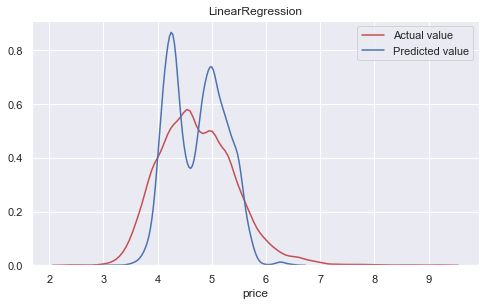

LinearRegression finished


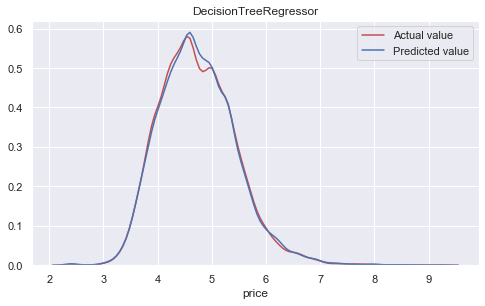

DecisionTreeRegressor finished


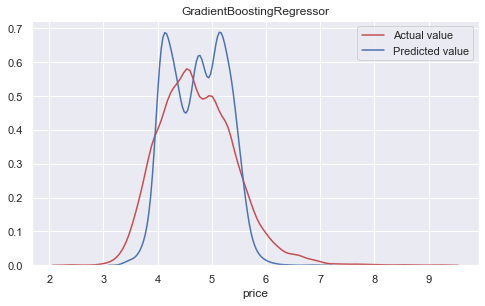

GradientBoostingRegressor finished


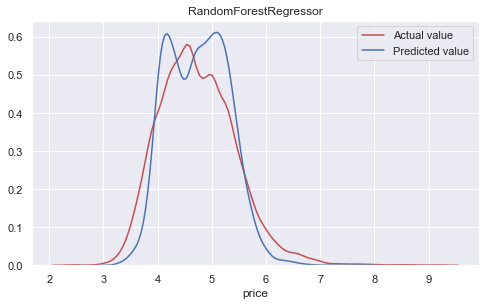

RandomForestRegressor finished


,model,mae,mse,rmse,r2_square
0,LinearRegression,0.345041,0.231619,0.481268,0.534836
1,DecisionTreeRegressor,0.435235,0.385295,0.620722,0.226204
2,GradientBoostingRegressor,0.322114,0.203677,0.451306,0.590951
3,RandomForestRegressor,0.310698,0.192779,0.439066,0.612839


In [77]:
list_of_models = [LinearRegression, DecisionTreeRegressor, 
                  GradientBoostingRegressor, RandomForestRegressor]

df_scores = compare_models(x_train_choosen, y_train_choosen, 
                           x_test_choosen, y_test_choosen, 
                           models=list_of_models)
df_scores

In [78]:
# model 	mae 	mse 	rmse 	r2_square
# 0 	LinearRegression 	0.345041 	0.231619 	0.481268 	0.534836
# 1 	DecisionTreeRegressor 	0.435235 	0.385295 	0.620722 	0.226204
# 2 	GradientBoostingRegressor 	0.322114 	0.203677 	0.451306 	0.590951
# 3 	RandomForestRegressor 	0.310698 	0.192779 	0.439066 	0.612839

==============================================================

Try improve RandomForestRegressor as the best model

In [79]:
from sklearn.model_selection import GridSearchCV

estimator = RandomForestRegressor()
param_grid = {
    "n_estimators": [100, 210],
    "min_samples_leaf": [2, 4, 8],
    "max_features": ["sqrt"],
    "min_samples_split" : [2, 6, 12],
    "max_depth": [5, 10, 17],
    "bootstrap": [True, False],
    }

grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=2)
grid.fit(x_train_choosen, y_train_choosen)

y_pred = grid.best_estimator_.predict(x_test_choosen)

print(
    metrics.mean_absolute_error(y_test_choosen, y_pred), '\n', 
    metrics.mean_squared_error(y_test_choosen, y_pred), '\n', 
    np.sqrt(metrics.mean_squared_error(y_test_choosen, y_pred)), '\n',
    metrics.r2_score(y_test_choosen, y_pred)
)

0.3061110681963948 
 0.18805452066095613 
 0.4336525344800329 
 0.6223265787751757


In [80]:
y_pred = grid.best_estimator_.predict(x_test_choosen)

print(
    metrics.mean_absolute_error(y_test_choosen, y_pred), '\n', 
    metrics.mean_squared_error(y_test_choosen, y_pred), '\n', 
    np.sqrt(metrics.mean_squared_error(y_test_choosen, y_pred)), '\n',
    metrics.r2_score(y_test_choosen, y_pred)
)

0.3061110681963948 
 0.18805452066095613 
 0.4336525344800329 
 0.6223265787751757


In [81]:
grid.best_score_ , grid.best_params_

(0.5978290872570093,
 {'bootstrap': True,
  'max_depth': 17,
  'max_features': 'sqrt',
  'min_samples_leaf': 2,
  'min_samples_split': 2,
  'n_estimators': 210})